<a href="https://colab.research.google.com/github/sadegerlih/white-wine-quality-control/blob/main/wine_quality_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from pandas.plotting import radviz

In [ ]:

data_url=("https://github.com/sadegerlih/white-wine-quality-control/raw/main/whitewine-rawData.xlsx")
data = pd.read_excel(data_url)
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [ ]:
#we use the "sample" command of pandas to shuffle our data, the random state means that we will always shuffle the data in the same way so that when different people load this code, they will all get the same results.
data= data.sample(frac=1, random_state=85)

#we print out the first 20 rows of our data to check that it has indeed been shuffled, on the left we have the index number which we can also think of as an ID number.
data.head(21)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1880,7.7,0.30,0.42,14.30,0.045,45.0,213.0,0.99910,3.18,0.63,9.2
2724,7.5,0.18,0.31,6.50,0.029,53.0,160.0,0.99276,3.03,0.38,10.9
462,5.9,0.25,0.19,12.40,0.047,50.0,162.0,0.99730,3.35,0.38,9.5
3929,6.6,0.32,0.47,15.60,0.063,27.0,173.0,0.99872,3.18,0.56,9.0
1240,7.9,0.14,0.28,1.80,0.041,44.0,178.0,0.99540,3.45,0.43,9.2
1223,8.0,0.28,0.42,7.10,0.045,41.0,169.0,0.99590,3.17,0.43,10.6
1058,7.5,0.21,0.34,1.20,0.060,26.0,111.0,0.99310,3.51,0.47,10.7
313,5.7,0.36,0.21,6.70,0.038,51.0,166.0,0.99410,3.29,0.63,10.0
2027,6.9,0.32,0.15,8.10,0.046,51.0,180.0,0.99580,3.13,0.45,8.9
3242,7.0,0.29,0.35,1.40,0.036,42.0,109.0,0.99119,3.31,0.62,11.6


In [ ]:
#From The SKlearn library, we can load this handy algorithm called "Local Outlier Factor", we'll call it lof for short from now on.
lof = LocalOutlierFactor(novelty=True)

#Using the ".fit" command, we are ordering our algorithm to learn from our data what a normal white wine should be like.
lof.fit(data)

print("Learning Done!")



Learning Done!


In [ ]:
#Chemical Data for Wine 1
wine_1= [[6.8,0.32,0.16,7,0.045,30,145,0.9949,3.18,0.47,9.6]]

#Chemical Data for Wine 2
wine_2 = [[7.6,1.58,0.0,2.1,0.136,50.0,9.0,0.99476,3.5,0.4,10.9]]

#Chemical Data for Wine 3
wine_3=[[5.2,0.37,0.2,7.6,0.046,35,110,0.9954,3.29,0.58,9.6]]


#We can use the ".predict" command to ask the algorithm to detect an anomaly, if it outputs "1", the wine is normal, if not it will output a "-1"


#We can then create a simple "if/else" condition that will give us the outcome in plain English.
print('for wine 1 :')
if lof.predict(wine_1)==1:
  print("This wine is normal, it passes quality control.")
else:
  print("Abnormal wine detected! Human checking is needed on this one!")
  
print('for wine 2 :')
if lof.predict(wine_2)==1:
  print("This wine is normal, it passes quality control.")
else:
  print("Abnormal wine detected! Human checking needed !")
  
print('for wine 3 :')
if lof.predict(wine_3)==1:
  print("This wine is normal, it passes quality control.")
else:
  print("Abnormal wine detected! Human checking is needed on this one!")


for wine 1 :
This wine is normal, it passes quality control.
for wine 2 :
Abnormal wine detected! Human checking needed !
for wine 3 :
This wine is normal, it passes quality control.


In [ ]:
#we import the kmeans algorithm from sklearn
kmeans= KMeans(n_clusters=3, verbose = 0)

#we use the ".fit" command to use the kmeans algorithm on our data
kmeans.fit(data)

#We create a new column in a data spreadsheet that records for each wine the category it was given
data['category']= kmeans.fit_predict(data)

label = data['category']
#prints out the different categories we have and the number of wines that were assigned to it
data['category'].value_counts()
print(label)

In [ ]:
#We initialize a list of empty lists that will later contain the wines of each category
category_0=[]
category_1=[]
category_2=[]

#this function will sort the first 100 wines of our spreadsheet based on what category they belong to.
for i in range (100):
  if (data.iloc[i]['category'])==0:
    category_0.append(data.index[i])
  if (data.iloc[i]['category'])==1:
    category_1.append(data.index[i])
  if (data.iloc[i]['category'])==2:
    category_2.append(data.index[i])

#Let´s print out the id number numbers belonging to each category.    
print(len(category_0),"wines in category 0:",category_0)

print(len(category_1),"wines in category 1:",category_1)

print(len(category_2),"wines in category 2:",category_2)

37 wines in category 0: [1058, 3242, 3736, 3225, 4133, 1391, 1668, 2605, 996, 4294, 1957, 2888, 4777, 4653, 1166, 3015, 3558, 330, 2631, 2566, 1349, 2061, 4669, 1015, 3071, 3986, 3323, 29, 3646, 3584, 3829, 3390, 3088, 3090, 566, 4842, 793]
20 wines in category 1: [1880, 1240, 2027, 3010, 1918, 2633, 3326, 500, 1734, 1117, 1789, 282, 1856, 3487, 620, 2789, 4501, 2824, 1947, 3752]
43 wines in category 2: [2724, 462, 3929, 1223, 313, 4687, 4524, 342, 2287, 3892, 407, 4601, 4698, 1364, 158, 3103, 1075, 2265, 1787, 997, 3886, 2820, 4780, 1529, 2657, 2749, 3074, 3984, 4846, 1673, 3729, 4594, 1420, 339, 2230, 509, 2206, 3126, 3469, 4347, 3834, 2203, 1242]


In [ ]:
#Here we use a short function to convert the categories numbers to plain English labels that we´ll be able to understand.

data['category'] = data['category'].apply(lambda x:"Medium Price" if x==2 else x)
data['category'] = data['category'].apply(lambda x:"Low Price" if x==1 else x)
data['category'] = data['category'].apply(lambda x:"High Price" if x==0 else x)

#We print the top part of our dataset to observe the changes
data.head(21)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
1880,7.7,0.30,0.42,14.30,0.045,45.0,213.0,0.99910,3.18,0.63,9.2,Low Price
2724,7.5,0.18,0.31,6.50,0.029,53.0,160.0,0.99276,3.03,0.38,10.9,Medium Price
462,5.9,0.25,0.19,12.40,0.047,50.0,162.0,0.99730,3.35,0.38,9.5,Medium Price
3929,6.6,0.32,0.47,15.60,0.063,27.0,173.0,0.99872,3.18,0.56,9.0,Medium Price
1240,7.9,0.14,0.28,1.80,0.041,44.0,178.0,0.99540,3.45,0.43,9.2,Low Price
1223,8.0,0.28,0.42,7.10,0.045,41.0,169.0,0.99590,3.17,0.43,10.6,Medium Price
1058,7.5,0.21,0.34,1.20,0.060,26.0,111.0,0.99310,3.51,0.47,10.7,High Price
313,5.7,0.36,0.21,6.70,0.038,51.0,166.0,0.99410,3.29,0.63,10.0,Medium Price
2027,6.9,0.32,0.15,8.10,0.046,51.0,180.0,0.99580,3.13,0.45,8.9,Low Price
3242,7.0,0.29,0.35,1.40,0.036,42.0,109.0,0.99119,3.31,0.62,11.6,High Price


In [ ]:
#We can use the ".predict" command for this

#A simple condition to interpret the output in plain english
if kmeans.predict(wine_1)==0:
        print("Wine 1 should be high priced (more than $50)")
if kmeans.predict(wine_1)==2:
        print("Wine 1 should be medium priced ($30-50)")
if kmeans.predict(wine_1)==1:
        print("Wine 1 should be low priced (less than $30)")


if kmeans.predict(wine_3)==0:
        print("Wine 3 should be high priced (more than $50)")
if kmeans.predict(wine_3)==2:
        print("Wine 3 should be medium priced ($30-$50)")
if kmeans.predict(wine_3)==1:
        print("Wine 3 should be low priced (less than $30)")


if kmeans.predict(wine_2)==0:
        print("Wine 3 should be high priced (more than $50)")
if kmeans.predict(wine_2)==2:
        print("Wine 3 should be medium priced ($30-$50)")
if kmeans.predict(wine_2)==1:
        print("Wine 3 should be low priced (less than $30)")

Wine 1 should be medium priced ($30-50)
Wine 3 should be high priced (more than $50)
Wine 3 should be high priced (more than $50)


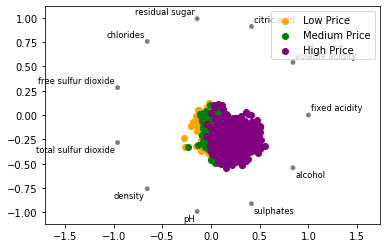

In [ ]:
pd.plotting.radviz(data, "category",color=['orange','green','purple'])

In [ ]:
#We create a program called "wine_categorizer"

def wine_categorizer():
  
  #The first prompt asks the user whether they have data correctly formatted. If not, they will have to enter it manually.
  
  deneme1=input("Do you have the wine data in the following format:[fixed acidity,volatile acidity,citric acid....]? (yes/no)")
  #if that is the case....
  if deneme1=="yes" or deneme1=="Yes" or deneme1=="y" or deneme1=="YES":
    #...we ask the user to simply copy and paste the line of data
    print("ok great! just copy and paste the data below")
    
    inputted_data=(input(":"))
    #This variable changes the user´s input from a string to a numerical list, that we can compute it
    formatted_data=[list(map(float,inputted_data.split(',')))]
  #if not we get the user to input the data manually, one variable at a time
  else:
    
    print("Ok, no problem, let´s do it manually:")
    
    entered_fixed_acidity=float(input("the wine´s fixed acidity:"))
    entered_volatile_acidity=float(input("volatile acidity:"))
    entered_citric_acid=float(input("citric acid:"))
    entered_residual_sugar=float(input("residual sugar:"))
    entered_chlorides=float(input("chloride levels:"))
    entered_free_sulfur_dioxide=float(input("free sulfur dioxide level:"))
    entered_total_sulfur_dioxide=float(input("total sulfur dioxide :"))
    entered_density=float(input("density:"))
    entered_pH=float(input("pH level :"))
    entered_sulphates=float(input("sulphates :"))
    entered_alcohol=float(input("alcohol% :"))
    #formatting the data so it can computed by our algorithms
    formatted_data=[[entered_fixed_acidity,entered_volatile_acidity,entered_citric_acid,entered_residual_sugar,entered_chlorides,entered_free_sulfur_dioxide,entered_total_sulfur_dioxide,entered_density,entered_pH,entered_sulphates,entered_alcohol]]
  #perform anomaly detection on the entered data and save it the variable "anomaly_check"
  anomaly_check=lof.predict(formatted_data)
  
  #if the anomaly check returns a 1, our data is not an anomaly
  if anomaly_check==1:
    print("This wine is normal, it passes quality control.")
    
     #if the anomaly check returns a -1, our data is an anomaly

  else:
    print("Abnormal wine detected! Human checking needed !")
  #If the wine is an anomaly, then we terminate the program early ( no need to proceed to the price categorization.)
  if anomaly_check==-1:
  #Asking the user whether they want to check a new wine. If the answer is "Yes", the program restarts  
    prompt2=input("Would you like to restart program to check another wine?(Yes/No)")
    if prompt2=="yes" or prompt2=="Yes" or prompt2=="y" or prompt2=="YES":
      wine_categorizer()
    elif prompt2=="no" or prompt2=="No" or prompt2=="n" or prompt2=="NO":
      quit()
    else:
      print("wrong option!!!")
      wine_categorizer()

 #If the wine is deemed normal by the wine, the program moves onto the price category algorithm 
  if anomaly_check==1:
      print("We will now proceed to the price categorization")
      
      #we use the ".predict" to what the price category the inputted wine would be
      price_category_check=kmeans.predict(formatted_data)
      if price_category_check==0:
        print("This wine should be high priced (more than $50)")
      if price_category_check==2:
        print("This wine should be medium priced ($30-50)")
      if price_category_check==1:
        print("This wine should be low priced (less than $30)")
      prompt2=input("Would you like to restart program to check another wine?(Yes/No)")
      if prompt2=="yes" or prompt2=="Yes" or prompt2=="y" or prompt2=="YES":
        wine_categorizer()
      else:
        quit()
  
wine_categorizer()

Do you have the wine data in the following format:[fixed acidity,volatile acidity,citric acid....]? (yes/no)yes
ok great! just copy and paste the data below
:7.6,0.2,0.3,14.2,0.056,53,212.5,0.999,3.14,0.46,8.9
This wine is normal, it passes quality control.
We will now proceed to the price categorization
This wine should be low priced (less than $30)
Would you like to restart program to check another wine?(Yes/No)yes
Do you have the wine data in the following format:[fixed acidity,volatile acidity,citric acid....]? (yes/no)yes
ok great! just copy and paste the data below
:7.2,0.15,0.39,1.8,0.043,21,159,0.9948,3.52,0.47,10
This wine is normal, it passes quality control.
We will now proceed to the price categorization
This wine should be medium priced ($30-50)
Would you like to restart program to check another wine?(Yes/No)no
